In [1]:
#Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Files
labs = pd.read_csv('Datasets/labs.csv')
examination = pd.read_csv('Datasets/examination.csv')
demographic = pd.read_csv('Datasets/demographic.csv')
diet = pd.read_csv('Datasets/diet.csv')
questionnaire = pd.read_csv('Datasets/questionnaire.csv')
#medications = pd.read_csv('Datasets/medications.csv')

In [2]:
#Merge all datasets
df1 = pd.merge(labs, examination, how="left", on="SEQN")
df2 = pd.merge(df1, demographic, how="left", on="SEQN")
df3 = pd.merge(df2, diet, how="left", on="SEQN")
nahnes_merged_dataset = pd.merge(df3, questionnaire, how="left", on="SEQN")

nahnes_merged_dataset.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [3]:
#Locate necessary columns for modeling
nahnes_dataset = nahnes_merged_dataset.loc[:,['SEQN', 'RIAGENDR', 'RIDAGEYR','DR1TCAFF', 'DR1TALCO', 'BMXWT', 'BMXHT', 
                                              'BPXPULS','BPXSY1', 'LBDHDD', 'ALQ130', 'SMQ040']]

nahnes_dataset.head()

,SEQN,RIAGENDR,RIDAGEYR,DR1TCAFF,DR1TALCO,BMXWT,BMXHT,BPXPULS,BPXSY1,LBDHDD,ALQ130,SMQ040
0,73557,1,69,203.0,0.0,78.3,171.3,1.0,122.0,65.0,1.0,3.0
1,73558,1,54,240.0,119.0,89.5,176.8,1.0,156.0,50.0,4.0,2.0
2,73559,1,72,45.0,0.0,88.9,175.3,1.0,140.0,60.0,NaN,3.0
3,73560,1,9,0.0,0.0,32.2,137.3,1.0,108.0,61.0,NaN,NaN
4,73561,2,73,24.0,0.0,52.0,162.4,1.0,136.0,85.0,NaN,NaN


In [4]:
#Modify columns with specific values that undesirable 
nahnes_dataset.loc[nahnes_dataset.RIAGENDR == 1, 'RIAGENDR'] = '0'
nahnes_dataset.loc[nahnes_dataset.RIAGENDR == 2, 'RIAGENDR'] = '1'
nahnes_dataset.loc[nahnes_dataset.SMQ040 == 3, 'SMQ040'] = '0'
nahnes_dataset.loc[nahnes_dataset.SMQ040 == 2, 'SMQ040'] = '1'
nahnes_dataset.loc[nahnes_dataset.BPXPULS == 1, 'BPXPULS'] = '0'
nahnes_dataset.loc[nahnes_dataset.BPXPULS == 2, 'BPXPULS'] = '1'

nahnes_dataset.head()

,SEQN,RIAGENDR,RIDAGEYR,DR1TCAFF,DR1TALCO,BMXWT,BMXHT,BPXPULS,BPXSY1,LBDHDD,ALQ130,SMQ040
0,73557,0,69,203.0,0.0,78.3,171.3,0,122.0,65.0,1.0,0
1,73558,0,54,240.0,119.0,89.5,176.8,0,156.0,50.0,4.0,1
2,73559,0,72,45.0,0.0,88.9,175.3,0,140.0,60.0,NaN,0
3,73560,0,9,0.0,0.0,32.2,137.3,0,108.0,61.0,NaN,NaN
4,73561,1,73,24.0,0.0,52.0,162.4,0,136.0,85.0,NaN,NaN


In [5]:
#Rename columns
nahnes_renamed = nahnes_dataset.rename(columns={'SEQN':'ID',
                                      'RIAGENDR':'Gender',
                                      'RIDAGEYR':'Age',
                                      'DR1TCAFF':'Caffeine (mg)',
                                      'DR1TALCO':'Alcohol (gm)',
                                      'BMXWT':'Weight (kg)',
                                      'BMXHT':'Standing Height (cm)',
                                      'BPXPULS':'Pulse regular or irregular',
                                      'BPXSY1':'Systolic: Blood pressure mm Hg',
                                      'LBDHDD': 'Direct HDL-Cholesterol (mg/dL)',
                                      'ALQ130':'Avg Drinks per Day',
                                      'SMQ040':'Smoker?'
                                      })

nahnes_renamed.head()

,ID,Gender,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Pulse regular or irregular,Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL),Avg Drinks per Day,Smoker?
0,73557,0,69,203.0,0.0,78.3,171.3,0,122.0,65.0,1.0,0
1,73558,0,54,240.0,119.0,89.5,176.8,0,156.0,50.0,4.0,1
2,73559,0,72,45.0,0.0,88.9,175.3,0,140.0,60.0,NaN,0
3,73560,0,9,0.0,0.0,32.2,137.3,0,108.0,61.0,NaN,NaN
4,73561,1,73,24.0,0.0,52.0,162.4,0,136.0,85.0,NaN,NaN


In [6]:
nahnes_renamed.describe()

,ID,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL),Avg Drinks per Day
count,9813.000000,9813.000000,8531.000000,8531.000000,9723.000000,9067.000000,7172.000000,7624.000000,3596.000000
mean,78644.559971,31.629573,93.338999,6.092814,62.599054,155.883759,118.123536,53.105194,3.511123
std,2938.592266,24.397553,157.170984,22.535972,32.331616,23.176270,18.078149,15.230838,28.866122
min,73557.000000,0.000000,0.000000,0.000000,3.100000,79.700000,66.000000,10.000000,1.000000
25%,76092.000000,10.000000,0.000000,0.000000,37.950000,149.500000,106.000000,42.000000,1.000000
50%,78643.000000,27.000000,25.000000,0.000000,65.300000,162.000000,116.000000,51.000000,2.000000
75%,81191.000000,52.000000,130.000000,0.000000,83.500000,171.050000,128.000000,61.000000,3.000000
max,83731.000000,80.000000,2448.000000,591.400000,222.600000,202.600000,228.000000,173.000000,999.000000


In [7]:
nahnes_reduced = nahnes_renamed.loc[:,['ID', 'Gender', 'Age','Caffeine (mg)', 'Alcohol (gm)', 'Weight (kg)', 'Standing Height (cm)', 
                                              'Pulse regular or irregular','Systolic: Blood pressure mm Hg', 'Direct HDL-Cholesterol (mg/dL)']]
nahnes_reduced.head()

,ID,Gender,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Pulse regular or irregular,Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL)
0,73557,0,69,203.0,0.0,78.3,171.3,0,122.0,65.0
1,73558,0,54,240.0,119.0,89.5,176.8,0,156.0,50.0
2,73559,0,72,45.0,0.0,88.9,175.3,0,140.0,60.0
3,73560,0,9,0.0,0.0,32.2,137.3,0,108.0,61.0
4,73561,1,73,24.0,0.0,52.0,162.4,0,136.0,85.0


In [11]:
#Drop all NA values
nahnes_na = nahnes_renamed.dropna(axis=0, how='any')
nahnes_reduced_na = nahnes_reduced.dropna(axis=0, how='any')

In [14]:
#reset index
nahnes_na.reset_index(drop=True, inplace=True)
nahnes_reduced_na.reset_index(drop=True, inplace=True)

nahnes_na.head()

,ID,Gender,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Pulse regular or irregular,Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL),Avg Drinks per Day,Smoker?
0,73557,0,69,203.0,0.0,78.3,171.3,0,122.0,65.0,1.0,0
1,73558,0,54,240.0,119.0,89.5,176.8,0,156.0,50.0,4.0,1
2,73562,0,56,144.0,0.0,105.0,158.7,0,160.0,38.0,1.0,0
3,73566,1,56,266.0,22.3,61.8,152.8,0,128.0,59.0,1.0,1
4,73567,0,65,43.0,39.1,65.3,172.4,0,140.0,79.0,3.0,1


In [15]:
nahnes_reduced_na.head()

,ID,Gender,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Pulse regular or irregular,Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL)
0,73557,0,69,203.0,0.0,78.3,171.3,0,122.0,65.0
1,73558,0,54,240.0,119.0,89.5,176.8,0,156.0,50.0
2,73559,0,72,45.0,0.0,88.9,175.3,0,140.0,60.0
3,73560,0,9,0.0,0.0,32.2,137.3,0,108.0,61.0
4,73561,1,73,24.0,0.0,52.0,162.4,0,136.0,85.0


In [16]:
nahnes_na.describe()

,ID,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL),Avg Drinks per Day
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,78599.497890,47.350914,189.922644,19.078551,82.703586,169.404712,122.644163,52.229958,3.890295
std,2914.190606,17.104100,220.790429,41.563626,20.935085,9.459327,17.344827,16.828267,26.555836
min,73557.000000,18.000000,0.000000,0.000000,42.200000,142.500000,66.000000,10.000000,1.000000
25%,76168.500000,33.000000,43.000000,0.000000,68.200000,162.600000,112.000000,40.000000,1.000000
50%,78530.500000,47.000000,144.000000,0.000000,79.700000,169.500000,120.000000,49.000000,2.000000
75%,81075.750000,62.000000,258.000000,22.400000,94.000000,176.100000,132.000000,60.750000,4.000000
max,83703.000000,80.000000,2448.000000,591.400000,187.800000,198.200000,220.000000,173.000000,999.000000


In [18]:
nahnes_reduced_na.describe()

,ID,Age,Caffeine (mg),Alcohol (gm),Weight (kg),Standing Height (cm),Systolic: Blood pressure mm Hg,Direct HDL-Cholesterol (mg/dL)
count,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000,6130.000000
mean,78655.826754,39.068189,115.359217,7.516998,75.243002,164.703202,118.286460,52.896574
std,2926.529579,21.530066,170.529805,24.766227,24.145095,12.362975,17.583203,15.175035
min,73557.000000,8.000000,0.000000,0.000000,16.900000,113.500000,66.000000,10.000000
25%,76113.000000,19.000000,3.000000,0.000000,59.400000,157.400000,106.000000,42.000000
50%,78687.000000,37.000000,56.000000,0.000000,73.300000,165.100000,116.000000,51.000000
75%,81175.500000,57.000000,158.000000,0.000000,88.800000,173.200000,128.000000,61.000000
max,83729.000000,80.000000,2448.000000,591.400000,222.600000,202.600000,228.000000,173.000000


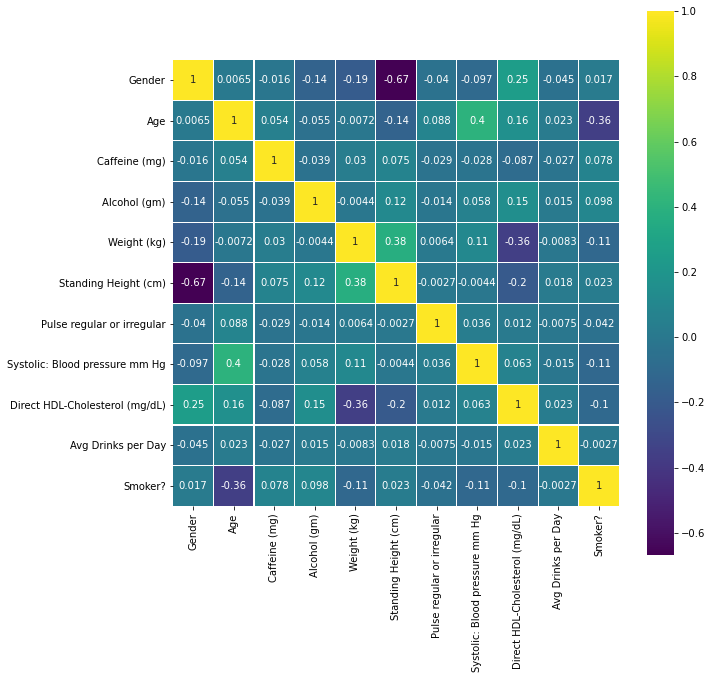

In [19]:
#Correlation heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(nahnes_na.astype(float).drop(axis=1, labels='ID').corr(), 
            linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

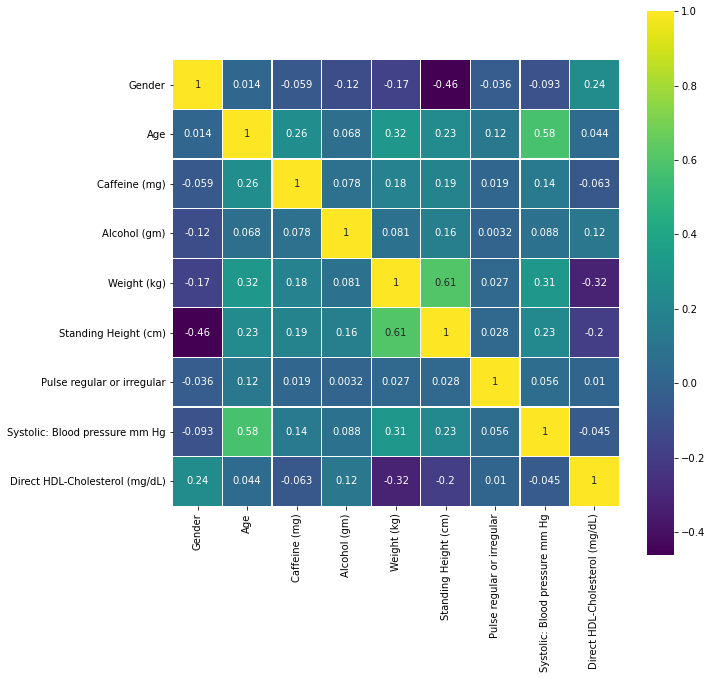

In [20]:
#Correlation heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(nahnes_reduced_na.astype(float).drop(axis=1, labels='ID').corr(), 
            linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [22]:
#Export to csv
nahnes_na.to_csv("Datasets/cleaned_data.csv", index=False, header=True)
nahnes_reduced_na.to_csv("Datasets/cleaned_data_reduced.csv", index=False, header=True)